# Drafting the prototype of what will be a module for adding filtered version of the image


In [6]:
%matplotlib inline

In [41]:
import matplotlib.pyplot as plt
import numpy as np

image = np.zeros((20, 20), dtype=float)
image[5:15, 5:15] = 1
image = image.astype(np.uint16)

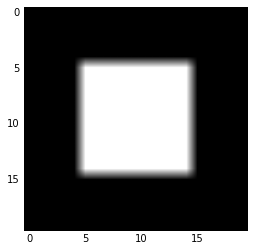

In [42]:
plt.imshow(image,cmap='gray'); #an input image

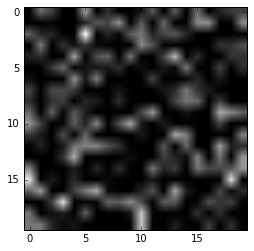

In [43]:
import skimage
out=skimage.util.random_noise(image, mode='gaussian', seed=None, clip=True)
plt.imshow(out,cmap='gray');

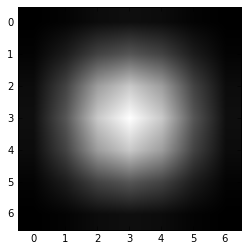

In [40]:
import skimage.filter as filters

sigma = 1
smooth = filters.gaussian(image, sigma)
plt.imshow(smooth,cmap='gray');

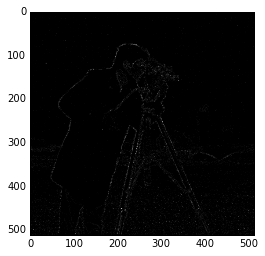

In [46]:
#this is NOT what you need if you want to add noise
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import noise_filter
img = data.camera()
out = noise_filter(img, disk(5))
plt.imshow(out,cmap='gray');

In [47]:
import cv2

ImportError: No module named 'cv2'